In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import os


In [ ]:
dailyActivity=pd.read_csv("/content/dailyActivity_merged.csv")
dailyCalories=pd.read_csv("/content/dailyCalories_merged.csv")
dailyIntensities=pd.read_csv("/content/dailyIntensities_merged.csv")
dailySteps=pd.read_csv("/content/dailySteps_merged.csv")
sleepDay=pd.read_csv("/content/clean_sleepDay.csv")
weightLog=pd.read_csv("/content/clean_weightStats.csv")
heartrate=pd.read_csv("/content/clean_heartRate.csv")




**DAILY ACTIVITY**

In [ ]:
dailyActivity.shape

(940, 15)

In [ ]:
dailyActivity.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

In [ ]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format='%m/%d/%Y')
dailyActivity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [ ]:
dailyActivity['ActivityDate'] = dailyActivity['ActivityDate'].dt.strftime('%Y-%m-%d')
dailyActivity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [ ]:
dailyActivity.duplicated().sum()

0

In [ ]:
dailyActivity= dailyActivity.sort_values(by=['Id', 'ActivityDate'])
dailyActivity.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

In [ ]:
dailyActivity.to_csv('clean_dailyActivity.csv', index=False)

**DAILY CALORIES**

In [ ]:
dailyCalories.shape

(940, 3)

In [ ]:
dailyCalories.head()

Id ActivityDay  Calories
0  1503960366   4/12/2016      1985
1  1503960366   4/13/2016      1797
2  1503960366   4/14/2016      1776
3  1503960366   4/15/2016      1745
4  1503960366   4/16/2016      1863

In [ ]:
dailyCalories['ActivityDay'] = pd.to_datetime(dailyCalories['ActivityDay'], format='%m/%d/%Y')

dailyCalories['ActivityDay'] = dailyCalories['ActivityDay'].dt.strftime('%Y-%m-%d')
dailyCalories


Id ActivityDay  Calories
0    1503960366  2016-04-12      1985
1    1503960366  2016-04-13      1797
2    1503960366  2016-04-14      1776
3    1503960366  2016-04-15      1745
4    1503960366  2016-04-16      1863
..          ...         ...       ...
935  8877689391  2016-05-08      2847
936  8877689391  2016-05-09      3710
937  8877689391  2016-05-10      2832
938  8877689391  2016-05-11      3832
939  8877689391  2016-05-12      1849

[940 rows x 3 columns]

In [ ]:
dailyCalories.duplicated().sum()

0

In [ ]:
dailyCalories = dailyCalories.sort_values(by=['Id', 'ActivityDay'])
dailyCalories.head()

Id ActivityDay  Calories
0  1503960366  2016-04-12      1985
1  1503960366  2016-04-13      1797
2  1503960366  2016-04-14      1776
3  1503960366  2016-04-15      1745
4  1503960366  2016-04-16      1863

In [ ]:
dailyCalories.to_csv('clean_dailyCalories.csv', index=False)

**DAILY INTENSITY**

In [ ]:
dailyIntensities.shape

(940, 10)

In [ ]:
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'], format='%m/%d/%Y')
dailyIntensities['ActivityDay'] = dailyIntensities['ActivityDay'].dt.strftime('%Y-%m-%d')
dailyIntensities.head()

Id ActivityDay  SedentaryMinutes  LightlyActiveMinutes  \
0  1503960366  2016-04-12               728                   328   
1  1503960366  2016-04-13               776                   217   
2  1503960366  2016-04-14              1218                   181   
3  1503960366  2016-04-15               726                   209   
4  1503960366  2016-04-16               773                   221   

   FairlyActiveMinutes  VeryActiveMinutes  SedentaryActiveDistance  \
0                   13                 25                      0.0   
1                   19                 21                      0.0   
2                   11                 30                      0.0   
3                   34                 29                      0.0   
4                   10                 36                      0.0   

   LightActiveDistance  ModeratelyActiveDistance  VeryActiveDistance  
0                 6.06                      0.55                1.88  
1                 4.71                      0.69                1.57  
2                 3.91                      0.40                2.44  
3                 2.83                      1.26                2.14  
4                 5.04                      0.41                2.71

In [ ]:
dailyIntensities.duplicated().sum()

0

In [ ]:
dailyIntensities = dailyIntensities.sort_values(by=['Id', 'ActivityDay'])

In [ ]:
dailyIntensities.to_csv('clean_dailyIntensity.csv', index=False)

**DAILY STEPS**

In [ ]:
dailySteps.shape

(940, 3)

In [ ]:
dailySteps.head()

Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669

In [ ]:
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'], format='%m/%d/%Y')
dailySteps['ActivityDay'] = dailySteps['ActivityDay'].dt.strftime('%Y-%m-%d')

dailySteps.head()

Id ActivityDay  StepTotal
0  1503960366  2016-04-12      13162
1  1503960366  2016-04-13      10735
2  1503960366  2016-04-14      10460
3  1503960366  2016-04-15       9762
4  1503960366  2016-04-16      12669

In [ ]:
dailySteps.duplicated().sum()

0

In [ ]:
dailySteps= dailySteps.sort_values(by=['Id', 'ActivityDay'])

In [ ]:
dailySteps.to_csv('clean_dailySteps.csv', index=False)

**MERGING OF DAILY FILES**

In [ ]:
print(dailyActivity.sample())
print(heartrate.sample())
print(sleepDay.sample())
print(weightLog.sample())

            Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
94  1844505072   2016-04-14        7937           5.25             5.25   

    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
94                       0.0                 0.0                       0.0   

    LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
94                 5.23                      0.0                  0   

    FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
94                    0                   373               843      2130  
               Id   Time  Heartrate         Day  DailyMeanHeartrate
52013  4020332650  03:48         64  2016-05-08           77.550835
             Id    SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
397  8792009665  2016-04-14                  1                 486   

     TotalTimeInBed  
397             503  
            Id     Weight    BMI Date Weight
35  6962181067  61.299999  23.9

In [ ]:
heartrate.head()

Id   Time  Heartrate         Day  DailyMeanHeartrate
0  2022484408  07:21        102  2016-04-12           74.051532
1  2022484408  07:22         92  2016-04-12           74.051532
2  2022484408  07:23         58  2016-04-12           74.051532
3  2022484408  07:24         58  2016-04-12           74.051532
4  2022484408  07:25         57  2016-04-12           74.051532

In [ ]:
columns_to_drop = ['Heartrate', 'Time']

# Drop the specified columns from the DataFrame
heartrate = heartrate.drop(columns=columns_to_drop)

# Drop duplicate rows based on all columns
heartrate = heartrate.drop_duplicates()

heartrate.head(5)

Id         Day  DailyMeanHeartrate
0     2022484408  2016-04-12           74.051532
718   2022484408  2016-04-13           78.640212
1474  2022484408  2016-04-14           70.548052
2244  2022484408  2016-04-15           78.629577
2954  2022484408  2016-04-16           74.498834

**MERGING DAILY ACTIVITY WITH HEART RATE**

In [ ]:
dailyActivity_heart = dailyActivity.merge(heartrate, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Day'], how='left')

dailyActivity_heart.rename(columns={'DailyMeanHeartrate': 'DailyAverageHeartrate'}, inplace=True)


In [ ]:
dailyActivity_heart.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06                      0.0                 25   
1                 4.71                      0.0                 21   
2                 3.91                      0.0                 30   
3                 2.83                      0.0                 29   
4                 5.04                      0.0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  Day  \
0                   13                   328               728      1985  NaN   
1                   19                   217               776      1797  NaN   
2                   11                   181              1218      1776  NaN   
3                   34                   209               726      1745  NaN   
4                   10                   221               773      1863  NaN   

   DailyAverageHeartrate  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN

In [ ]:
sleepDay.head()

Id    SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  2016-04-12                  1                 327   
1  1503960366  2016-04-13                  2                 384   
2  1503960366  2016-04-15                  1                 412   
3  1503960366  2016-04-16                  2                 340   
4  1503960366  2016-04-17                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712

**MERGING PREVIOUS FILE WITH SLEEP**

In [ ]:
dailyActivity_heart_sleep = pd.merge(dailyActivity_heart, sleepDay, left_on=['Id', 'ActivityDate'], right_on=['Id', 'SleepDay'], how='left')
dailyActivity_heart_sleep

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                   6.06                     0.00  ...                   13   
1                   4.71                     0.00  ...                   19   
2                   3.91                     0.00  ...                   11   
3                   2.83                     0.00  ...                   34   
4                   5.04                     0.00  ...                   10   
..                   ...                      ...  ...                  ...   
935                 6.80                     0.00  ...                    4   
936                 6.24                     0.05  ...                   19   
937                 6.28                     0.00  ...                   11   
938                 5.89                     0.00  ...                   12   
939                 4.25                     0.00  ...                    1   

     LightlyActiveMinutes  SedentaryMinutes  Calories         Day  \
0                     328               728      1985         NaN   
1                     217               776      1797         NaN   
2                     181              1218      1776         NaN   
3                     209               726      1745         NaN   
4                     221               773      1863         NaN   
..                    ...               ...       ...         ...   
935                   245              1174      2847  2016-05-08   
936                   217              1131      3710  2016-05-09   
937                   224              1187      2832  2016-05-10   
938                   213              1127      3832  2016-05-11   
939                   137               770      1849  2016-05-12   

    DailyAverageHeartrate    SleepDay TotalSleepRecords  TotalMinutesAsleep  \
0                     NaN  2016-04-12               1.0               327.0   
1                     NaN  2016-04-13               2.0               384.0   
2                     NaN         NaN               NaN                 NaN   
3                     NaN  2016-04-15               1.0  

In [ ]:
weightLog.head()

Id      Weight        BMI Date Weight
0  1503960366   52.599998  22.650000  2016-05-02
1  1503960366   52.599998  22.650000  2016-05-03
2  1927972279  133.500000  47.540001  2016-04-13
3  2873212765   56.700001  21.450001  2016-04-21
4  2873212765   57.299999  21.690001  2016-05-12

**FINALLY MERGING WITH WEIGHT**

In [ ]:
final = dailyActivity_heart_sleep.merge(weightLog, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date Weight'], how='left')
final.head(5)

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  ...  Calories  Day  \
0                 6.06                      0.0  ...      1985  NaN   
1                 4.71                      0.0  ...      1797  NaN   
2                 3.91                      0.0  ...      1776  NaN   
3                 2.83                      0.0  ...      1745  NaN   
4                 5.04                      0.0  ...      1863  NaN   

   DailyAverageHeartrate    SleepDay  TotalSleepRecords TotalMinutesAsleep  \
0                    NaN  2016-04-12                1.0              327.0   
1                    NaN  2016-04-13                2.0              384.0   
2                    NaN         NaN                NaN                NaN   
3                    NaN  2016-04-15                1.0              412.0   
4                    NaN  2016-04-16                2.0              340.0   

   TotalTimeInBed Weight  BMI  Date Weight  
0           346.0    NaN  NaN          NaN  
1           407.0    NaN  NaN          NaN  
2             NaN    NaN  NaN          NaN  
3           442.0    NaN  NaN          NaN  
4           367.0    NaN  NaN          NaN  

[5 rows x 24 columns]

In [ ]:
final.shape

(940, 24)

In [ ]:
columns_to_drop = ['Date Weight', 'SleepDay', 'Day']

final = final.drop(columns=columns_to_drop)

In [ ]:
final.duplicated().sum()

0

In [ ]:
final=final.round(2)
final.head()

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366   2016-04-12       13162           8.50             8.50   
1  1503960366   2016-04-13       10735           6.97             6.97   
2  1503960366   2016-04-14       10460           6.74             6.74   
3  1503960366   2016-04-15        9762           6.28             6.28   
4  1503960366   2016-04-16       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                 6.06                      0.0  ...                   13   
1                 4.71                      0.0  ...                   19   
2                 3.91                      0.0  ...                   11   
3                 2.83                      0.0  ...                   34   
4                 5.04                      0.0  ...                   10   

   LightlyActiveMinutes  SedentaryMinutes  Calories  DailyAverageHeartrate  \
0                   328               728      1985                    NaN   
1                   217               776      1797                    NaN   
2                   181              1218      1776                    NaN   
3                   209               726      1745                    NaN   
4                   221               773      1863                    NaN   

   TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed  Weight  BMI  
0                1.0               327.0           346.0     NaN  NaN  
1                2.0               384.0           407.0     NaN  NaN  
2                NaN                 NaN             NaN     NaN  NaN  
3                1.0               412.0           442.0     NaN  NaN  
4                2.0               340.0           367.0     NaN  NaN  

[5 rows x 21 columns]

In [ ]:
final.to_csv('latest_merged_DailyStats.csv', index=False)

**CORRELATION ANALYSIS**

In [ ]:
num_column = final.select_dtypes(include='number')
matrix = num_column.corr()
matrix

Id  TotalSteps  TotalDistance  \
Id                        1.000000    0.185721       0.241000   
TotalSteps                0.185721    1.000000       0.985369   
TotalDistance             0.241000    0.985369       1.000000   
TrackerDistance           0.238816    0.984822       0.999505   
LoggedActivitiesDistance  0.187965    0.181850       0.188323   
VeryActiveDistance        0.308691    0.740115       0.794582   
ModeratelyActiveDistance  0.026665    0.507105       0.470758   
LightActiveDistance       0.019629    0.692208       0.662002   
SedentaryActiveDistance  -0.015698    0.070505       0.082389   
VeryActiveMinutes         0.303608    0.667079       0.681297   
FairlyActiveMinutes       0.051158    0.498693       0.462899   
LightlyActiveMinutes     -0.098754    0.569600       0.516300   
SedentaryMinutes         -0.043319   -0.327484      -0.288094   
Calories                  0.396671    0.591568       0.644962   
DailyAverageHeartrate     0.025742    0.011922       0.006960   
TotalSleepRecords        -0.011591   -0.160958      -0.142386   
TotalMinutesAsleep        0.082158   -0.190344      -0.176936   
TotalTimeInBed            0.004339   -0.166232      -0.161177   
Weight                    0.351346    0.288910       0.384915   
BMI                      -0.206405   -0.163150      -0.092568   

                          TrackerDistance  LoggedActivitiesDistance  \
Id                               0.238816                  0.187965   
TotalSteps                       0.984822                  0.181850   
TotalDistance                    0.999505                  0.188323   
TrackerDistance                  1.000000                  0.162572   
LoggedActivitiesDistance         0.162572                  1.000000   
VeryActiveDistance               0.794338                  0.150843   
ModeratelyActiveDistance         0.470277                  0.076539   
LightActiveDistance              0.661365                  0.138291   
SedentaryActiveDistance          0.074591                  0.155121   
VeryActiveMinutes                0.680816                  0.234342   
FairlyActiveMinutes              0.463154                  0.053864   
LightlyActiveMinutes             0.514713                  0.102175   
SedentaryMinutes                -0.289343                 -0.046967   
Calories                         0.645313                  0.207484   
DailyAverageHeartrate           -0.006357                  0.295305   
TotalSleepRecords               -0.142034                 -0.045242   
TotalMinutesAsleep              -0.177597                 -0.038822   
TotalTimeInBed                  -0.161365                 -0.058174   
Weight                           0.388842                 -0.158231   
BMI                             -0.090443                 -0.074605   

                          VeryActiveDistance  ModeratelyActiveDistance  \
Id                                  0.308691                  0.026665   
TotalSteps                          0.740115                  0.507105   
TotalDistance                       0.794582                  0.470758   
TrackerDistance                     0.794338                  0.470277   
LoggedActivitiesDistance            0.150843                  0.076539   
VeryActiveDistance                  1.000000                  0.192986   
ModeratelyActiveDistance            0.192986                  1.000000   
LightActiveDistance                 0.157669                  0.237847   
SedentaryActiveDistance             0.046117                  0.005793   
VeryActiveMinutes                   0.826681                  0.225464   
FairlyActiveMinutes                 0.211730                  0.946934   
LightlyActiveMinutes                0.059845                  0.162092   
SedentaryMinutes                   -0.061754                 -0.221436   
Calories                            0.491959                  0.216790   
DailyAverageHeartrate               0.019929                 -0.

**USERS WITH MOST ACTIVE AND LESS ACTIVE MINUTES**

In [ ]:
most_active_users = final.sort_values(by=['VeryActiveMinutes', 'FairlyActiveMinutes'], ascending=False).head(10)[['Id', 'ActivityDate','VeryActiveMinutes', 'FairlyActiveMinutes']]
most_active_users

Id ActivityDate  VeryActiveMinutes  FairlyActiveMinutes
579  5577150313   2016-04-24                210                   65
585  5577150313   2016-04-30                207                   45
572  5577150313   2016-04-17                200                   37
586  5577150313   2016-05-01                194                   72
50   1624580081   2016-05-01                186                   63
571  5577150313   2016-04-16                184                   56
827  8378563200   2016-04-21                137                   16
771  8053475328   2016-04-15                132                    8
780  8053475328   2016-04-24                129                   33
779  8053475328   2016-04-23                125                   14

In [ ]:
less_active_users = final[(final['VeryActiveMinutes'] > 0) & (final['FairlyActiveMinutes'] > 0)]
less_active_users = less_active_users.sort_values(by=['VeryActiveMinutes', 'FairlyActiveMinutes']).head(10)[['Id', 'ActivityDate', 'VeryActiveMinutes', 'FairlyActiveMinutes']]
less_active_users

Id ActivityDate  VeryActiveMinutes  FairlyActiveMinutes
393  4319703577   2016-04-24                  1                    5
135  1927972279   2016-04-24                  1                    6
271  2873212765   2016-04-18                  1                    6
286  2873212765   2016-05-03                  1                    6
82   1644430081   2016-05-02                  1                    7
252  2347167796   2016-04-17                  1                    7
508  4702921684   2016-04-15                  1                    8
519  4702921684   2016-04-26                  1                    8
383  4319703577   2016-04-14                  1                    9
387  4319703577   2016-04-18                  1                    9

**DATA VISUALISATION**

**1. HEATMAP**

Text(0.5, 1.0, 'COORELATION HEATMAP OF DAILY STATS')

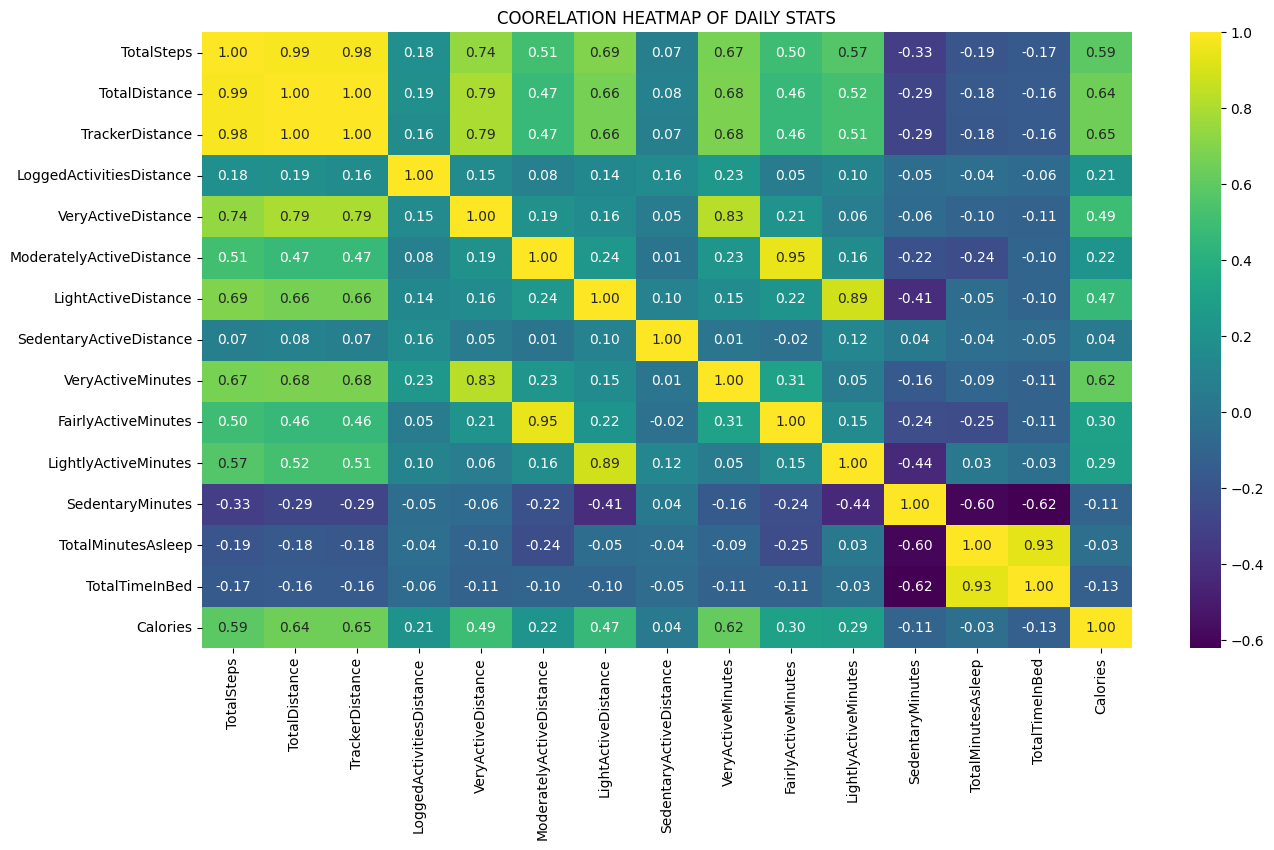

In [ ]:
total_corr = final[["TotalSteps", "TotalDistance", "TrackerDistance", "LoggedActivitiesDistance","VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance", "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes", "TotalMinutesAsleep", "TotalTimeInBed", "Calories"]].corr()

# plotting the heatmap
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(total_corr, annot=True, fmt = '.2f', cmap="viridis")
plt.title("COORELATION HEATMAP OF DAILY STATS")

**2. SCATTER PLOT**

In [ ]:
fig1 = px.scatter(final, x='TotalDistance', y='TotalSteps', title='Scatter Plot between Steps and Distance',
                  labels={'TotalDistance': 'Total Distance', 'TotalSteps': 'Total Steps'},
                  color_discrete_sequence=['darkviolet'])
fig1.show()


**3. PAIR PLOT**

In [ ]:
fig = px.scatter_matrix(final, dimensions=['TotalDistance', 'TrackerDistance', 'TotalSteps'],
                        title='Pair Plot',
                        labels={'Total Distance': 'Total Distance', 'TrackerDistance': 'TrackerDistance','Total Steps': 'Total Steps'},
                        color_discrete_sequence=['slateblue'])
fig.show()


**4. BAR CHART**

In [ ]:
fig1 = px.bar(final, x='ActivityDate', y='DailyAverageHeartrate',
              title='Bar Plot: Activity Date vs. Daily Average Heartrate',
              labels={'ActivityDate': 'Activity Date', 'DailyAverageHeartrate': 'Daily Average Heartrate'},
              color_discrete_sequence=['orange'])
fig1.show()